線形回帰モデルを使用した解析結果

In [34]:
from sklearn.datasets import load_boston
data = load_boston()
X = data.data[:, [5,]] #平均部屋数
y = data.target #目的変数

In [35]:
from sklearn.linear_model import LinearRegression
model_lir = LinearRegression()
model_lir.fit(X, y)
y_pred = model_lir.predict(X)

In [36]:
print(model_lir.coef_) #線形モデルの傾き
print(model_lir.intercept_) #線形モデルの切片

[9.10210898]
-34.670620776438554


結果の可視化

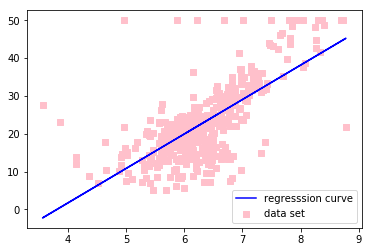

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X, y, c="pink", marker="s", label="data set")
ax.plot(X, y_pred, c="blue", label="regresssion curve")
ax.legend()
plt.show()

ばらつきを求める

In [38]:
#平均二乗誤差
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

43.60055177116956

In [39]:
#決定係数：平均二乗誤差を使用した、学習済モデルの予測の当てはまり度合いを示す
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.48352545599133423

SVRで解析を行った結果と比較する

In [40]:
from sklearn.svm import SVR
model_svr_linear = SVR(C=0.01, kernel="linear")
model_svr_linear.fit(X, y)
y_svr_pred = model_svr_linear.predict(X)

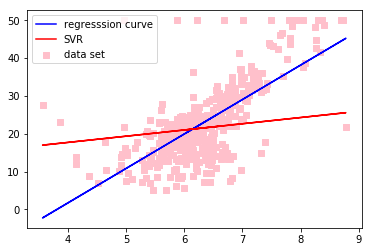

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X, y, c="pink", marker="s", label="data set")
ax.plot(X, y_pred, c="blue", label="regresssion curve")
ax.plot(X, y_svr_pred, c="red", label="SVR")
ax.legend()
plt.show()

In [42]:
print(mean_squared_error(y, y_svr_pred)) #平均二乗誤差
print(r2_score(y, y_svr_pred)) #決定係数
print(model_svr_linear.coef_) #傾き
print(model_svr_linear.intercept_) #切片

72.14197118147209
0.14543531775956597
[[1.64398]]
[11.13520958]


線形回帰と比べ、誤差、決定係数がともに悪化する方向。

交差検証(クロスバリデーション)  
20%の検証データを5回実施する

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


cv = KFold(5, shuffle=True)
model_rfc_1 = RandomForestClassifier()
cross_val_score(model_rfc_1, X, y, cv=cv, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'